## Библиотеки для обучения нейронных сетей


<img src="images/power_scores.png">
<a href="https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a">Source</a>

## Зачем нужны библиотеки для обучения нейронных сетей?


* иметь качественные и эффективные реализации лоссов, слоев, оптимизаторов
* стандартизация кода, использование сторонних библиотек/моделей/имплементаций статей от коммьюнити
* простое ускорение с помощью GPU

Как обучаюся нейронные сети?
* метод обратного распространения ошибки

Что для него нужно?
* посчитать производные

Поэтому в основе любого NN фреймворка лежит autograd

## Pytorch

### Tensors

Тензор -- многомерный массив и основной объект в Pytorch. Операции с тензорами происходят почти также как и с массивами в numpy

In [1]:
import torch
import numpy as np
# Базовый класс -- torch.Tensor 
x = torch.Tensor()
print(x, x.type())
print("Tensor's device: ", x.device)

# x.to("cuda") # выдаст ошибку на машине без настроенной CUDA

tensor([]) torch.FloatTensor
Tensor's device:  cpu


In [2]:
# Создание тензора "из данных"
x = torch.tensor([10., 20., 30.]) # np.array([10., 20., 30.])
print(f"I'm {x}, my type is {x.type()}")

I'm tensor([10., 20., 30.]), my type is torch.FloatTensor


In [3]:
# Дополнительно мы можем указать тип тензора с помощью dtype
x = torch.tensor([10., 20., 30.], dtype=torch.long) # np.array([10., 20., 30.], dtype=np.int32)
print(f"I'm {x}, my type is {x.type()}")

I'm tensor([10, 20, 30]), my type is torch.LongTensor


In [4]:
# Мы можем создать тензор из np.ndarray
numpy_arr = np.eye(4)
x = torch.from_numpy(numpy_arr)
print(f"I'm {x}, my type is {x.type()}. \nI was created from ndarray: \n{numpy_arr}")

I'm tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64), my type is torch.DoubleTensor. 
I was created from ndarray: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# Метод from_numpy не создает тензор, он использает тот же участок памяти, что и массив. 
# Поэтому изменив массив -- мы изменим тензор.
numpy_arr[:, 0] = 50
print(x)

tensor([[50.,  0.,  0.,  0.],
        [50.,  1.,  0.,  0.],
        [50.,  0.,  1.,  0.],
        [50.,  0.,  0.,  1.]], dtype=torch.float64)


In [6]:
# Можно создавать тензоры и без данных. 

# Ниже несколько примеров, которые почти эквивалентны соответствующим в numpy
x = torch.rand(3,3) # np.random.rand(3,3)
print(f"Random tensor {x}")
x = torch.eye(3) # np.eye(3)
print(f"Identity tensor {x}")
x = torch.ones(4, 5) # np.ones((4,5))
print(f"All-ones tensor {x}")
x = torch.zeros(4, 5) # np.zeros((4,5))
print(f"All-zeros tensor {x}")

Random tensor tensor([[0.9245, 0.9449, 0.9206],
        [0.3395, 0.5080, 0.7906],
        [0.1643, 0.2366, 0.8251]])
Identity tensor tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
All-ones tensor tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
All-zeros tensor tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [7]:
# Pytorch умеет превращать тензор в numpy ndarray
x = torch.rand(2,2)
x_np = x.numpy()
print(f"I'm {x_np}, my type is {type(x_np)} ")

I'm [[0.16141993 0.30023092]
 [0.01902831 0.63294196]], my type is <class 'numpy.ndarray'> 


In [8]:
# Размер тензора можно узнать с помощью .size(), .shape
x = torch.rand(2,2)
print("x.shape: ", x.shape, "\nx.size(): ", x.size())

x.shape:  torch.Size([2, 2]) 
x.size():  torch.Size([2, 2])


In [9]:
# Менять размер тензора можно с помощью .view([s_1,s_2,s_3.., s_n]).
# Произведение  s_1 * ... * s_n -- должно быть равно количеству элементов. Одну из s_i можно заменить
# на -1, тогда она рассчитается автоматически
x = torch.arange(12)
print(x.view([2,6]).numpy())
print(x.view([3,-1]).numpy()) 
print(x.view([2, 3, -1]).numpy())
try:
    print(x.view([2, 5]).numpy())
except RuntimeError as e:
    print(f"Wrong dimentions produce the following error: {e}")

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
Wrong dimentions produce the following error: shape '[2, 5]' is invalid for input of size 12


In [10]:
# В заключении этого блока покажем, что изменять значение тензора можно прямым обращением по индексу.
import torch
x = torch.arange(25).view((-1, 5))
print(x)
print(x[2,4])
print(x[2])
print(x[[0,1,2,3], 0])
x[[0,1,2,3,4], 0] = 100
print(x)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
tensor(14)
tensor([10, 11, 12, 13, 14])
tensor([ 0,  5, 10, 15])
tensor([[100,   1,   2,   3,   4],
        [100,   6,   7,   8,   9],
        [100,  11,  12,  13,  14],
        [100,  16,  17,  18,  19],
        [100,  21,  22,  23,  24]])


### Операции над тензорами

In [11]:
# Операции над тензорами производятся интуитивно понятно. Разберем это на примере двуслойной сети и подсчета 
# лосса -- среднеквадратичного отклонения

batch_size = 3
n_features = 10
H_n = 30

# сначала создадим все необходимые тензоры -- рандомный вход, выход и веса. Это делать мы уже умеем )
y_real = torch.rand(batch_size)
x = torch.rand(batch_size, n_features)

w_1 = torch.rand(n_features, H_n)
b_1 = torch.rand(H_n)

w_2 = torch.rand(H_n, 1)
b_2 = torch.rand(1)


y_h_1 = (x.matmul(w_1) + b_1).clamp(min=0) # relu
y_pred = y_h_1.matmul(w_2)+b_2

print(y_pred)

loss = (y_pred - y_real).pow(2).sum()
print(loss)

tensor([[31.7239],
        [35.6564],
        [37.1364]])
tensor(10698.3398)


## Autograd

In [12]:
a = torch.tensor(2.)
b = torch.tensor(1.)

c = a + b
d = b + 1
e = c * d

print(a,b,c,d,e)

tensor(2.) tensor(1.) tensor(3.) tensor(2.) tensor(6.)


Мы можем представить это в виде следующего графа:
<img src="images/tree-eval.png" width="400">

Тепрь посчитаем частные производные по $a$ и $b$.
$$\frac{\partial e}{\partial a} = \frac{\partial e}{\partial c} \frac{\partial c}{\partial a}$$
$$\frac{\partial e}{\partial b} = \frac{\partial e}{\partial c} \frac{\partial c}{\partial b} + 
\frac{\partial e}{\partial d} \frac{\partial d}{\partial b}$$


Можно заметить, что, считая поизводные мы спускаемся про графу сверху вниз, считая производные одного узла по соседнему.

<img src="images/tree-eval-derivs.png" width="400">

$\frac{\partial e}{\partial a}$ равна произведению значений на ребрах по пути из $a$ в $e$.

Из $b$ в $e$ идет два пути, и в формуле выше мы видим что мы суммируем значения, полученные для каждого из путей.

Подробнее про бэкпроп: http://colah.github.io/posts/2015-08-Backprop/

Как автоград устроен в питорче: https://youtu.be/MswxJw-8PvE






Чтобы посчитать градиент в питорче, нужно обратиться к полю .grad

In [13]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

c = a + b
d = b + 1
e = c * d
e.backward()
print("de/da = ", a.grad.item(), "de/db = ", b.grad.item())

de/da =  2.0 de/db =  5.0


In [14]:
c.backward()
print("dc/da = ", a.grad.item(), "dc/db = ", b.grad.item())
# Почему это неправильно?

dc/da =  3.0 dc/db =  6.0


In [15]:
# zero gradients !
a.grad.data.zero_()
b.grad.data.zero_()
c.backward()
print("dc/da = ", a.grad.item(), "dc/db = ", b.grad.item())
# чаще всего это не приходится делать вручную

dc/da =  1.0 dc/db =  1.0


In [16]:
# Теперь напишем бекпроп и зафитим случайную выборку )
# источник: https://github.com/jcjohnson/pytorch-examples
device = torch.device('cpu')
# N размер бача; D_in размер кода;
# H размер скрытого слоя; D_out размер выхода
N, D_in, H, D_out = 64, 1000, 100, 10

# Создадим случайную выборку
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Инициализируем веса сети
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

In [17]:
learning_rate = 1e-6
for t in range(500):
    # Forward pass
    y_pred = (x.mm(w1).clamp(min=0)).mm(w2)
    # Считаем средне-квадратичное отклонение -- лосс
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    # считаем производные по параметрам 
    loss.backward()
    with torch.no_grad():
        # градиентный спуск
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # зануляем градиенты
        w1.grad.zero_()
        w2.grad.zero_()

0 35147836.0
1 30292718.0
2 26898930.0
3 21735732.0
4 15260194.0
5 9541142.0
6 5628338.5
7 3369475.0
8 2148395.25
9 1488037.5
10 1110026.75
11 874525.75
12 714458.375
13 597263.125
14 506808.09375
15 434456.03125
16 375255.1875
17 326150.4375
18 284905.0625
19 249888.9375
20 219930.1875
21 194178.25
22 171917.4375
23 152526.984375
24 135648.34375
25 120921.9765625
26 108024.640625
27 96685.5859375
28 86691.1171875
29 77849.4921875
30 70017.90625
31 63068.59765625
32 56895.9609375
33 51396.48828125
34 46483.00390625
35 42091.8671875
36 38154.40234375
37 34621.3984375
38 31444.52734375
39 28584.3203125
40 26004.85546875
41 23678.04296875
42 21575.71484375
43 19672.814453125
44 17951.025390625
45 16391.109375
46 14978.3232421875
47 13696.42578125
48 12531.69921875
49 11474.5634765625
50 10512.67578125
51 9636.478515625
52 8838.017578125
53 8109.69921875
54 7445.0107421875
55 6838.84375
56 6284.96875
57 5778.41357421875
58 5315.298828125
59 4891.5185546875
60 4503.435546875
61 4147.7714843

466 2.9095357604091987e-05
467 2.8738388209603727e-05
468 2.829541335813701e-05
469 2.7936044716625474e-05
470 2.752624459390063e-05
471 2.722899807849899e-05
472 2.687811320356559e-05
473 2.65902799583273e-05
474 2.6254396289004944e-05
475 2.5989073037635535e-05
476 2.5662402549642138e-05
477 2.552363366703503e-05
478 2.5223700504284352e-05
479 2.4946739358711056e-05
480 2.469572427798994e-05
481 2.4469149138894863e-05
482 2.4161428882507607e-05
483 2.3877011699369177e-05
484 2.362662235100288e-05
485 2.337420119147282e-05
486 2.323110129509587e-05
487 2.3122905986383557e-05
488 2.2777958292863332e-05
489 2.2561276637134142e-05
490 2.2324900783132762e-05
491 2.2147540221340023e-05
492 2.1820549591211602e-05
493 2.1556465071626008e-05
494 2.1257625121506862e-05
495 2.0936011424055323e-05
496 2.073961150017567e-05
497 2.0500125174294226e-05
498 2.0352075807750225e-05
499 2.006729118875228e-05


## torch.nn, torch.optim

Удобство библиотеки не ограничивается одним только автоградом. Многое из того что мы написали выше уже реализовано.

В частности, стандартные слои, функции активаций, лоссы, оптимизаторы. Вот как выгдядит упрощенная версия кода, использующая модуль torch.nn и torch.optim

In [18]:
# В моделе класса Sequential операции выполняются одна за другой. 
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H), # мы не определяем параметры сами -- за это отвечает модель
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        )

for name, parameter in model.named_parameters():
    print(name, parameter.shape)

0.weight torch.Size([100, 1000])
0.bias torch.Size([100])
2.weight torch.Size([10, 100])
2.bias torch.Size([10])


In [19]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Шаг оптимизации
    optimizer.step()

0 673.787353515625
1 656.736328125
2 640.2059936523438
3 624.0905151367188
4 608.3638305664062
5 593.0985107421875
6 578.2589721679688
7 563.836669921875
8 549.8015747070312
9 536.1150512695312
10 522.8543701171875
11 509.9844970703125
12 497.44989013671875
13 485.2464294433594
14 473.31402587890625
15 461.67242431640625
16 450.3407287597656
17 439.24853515625
18 428.4283447265625
19 417.93414306640625
20 407.73089599609375
21 397.8451232910156
22 388.2198181152344
23 378.8607177734375
24 369.7318420410156
25 360.76068115234375
26 352.0252685546875
27 343.51678466796875
28 335.2259521484375
29 327.1700134277344
30 319.28961181640625
31 311.56781005859375
32 304.0243835449219
33 296.64013671875
34 289.4394226074219
35 282.4671936035156
36 275.65643310546875
37 269.0001220703125
38 262.4930114746094
39 256.11004638671875
40 249.89584350585938
41 243.8314971923828
42 237.91880798339844
43 232.14642333984375
44 226.48916625976562
45 220.9297637939453
46 215.48004150390625
47 210.1496429443

375 0.0056745801120996475
376 0.005473798606544733
377 0.005279494449496269
378 0.005091504659503698
379 0.0049096145667135715
380 0.004733696114271879
381 0.004563529510051012
382 0.004399007651954889
383 0.004239918198436499
384 0.004086114466190338
385 0.003937441855669022
386 0.0037937392480671406
387 0.00365486741065979
388 0.0035206873435527086
389 0.0033910509664565325
390 0.0032658111304044724
391 0.00314483349211514
392 0.003028016770258546
393 0.0029152012430131435
394 0.0028062795754522085
395 0.002701123943552375
396 0.0025996414478868246
397 0.002501674694940448
398 0.002407132415100932
399 0.002315903315320611
400 0.002227888675406575
401 0.0021429825574159622
402 0.002061093458905816
403 0.001982129877433181
404 0.0019059807527810335
405 0.0018325528362765908
406 0.0017617713892832398
407 0.0016935510793700814
408 0.0016277713002637029
409 0.0015643879305571318
410 0.001503320294432342
411 0.0014444891130551696
412 0.001387799042277038
413 0.0013331999070942402
414 0.001

## nn.Module, nn.Dataset

<img src="images/fashion-mnist-sprite.png" width="600">
</br>

Теперь попробуем обучить классификатор одежды для датасета FashionMNIST (https://github.com/zalandoresearch/fashion-mnist ). 

Основные новые концепции, которые мы усвоим на этом примере -- **Dataset,  Dataloader, Model**. Они необходимы для удобной работы с библиотекой.

In [20]:
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
from utils import download_mnist, save_mnist, load

# Начнем с класса Dataset. По названию можно догадаться, что он нужен для работы с датасетами ) 
# Это очень удобная абстракция, которая в дальнейшем может быть использована в комбинации с 
# Dataloader, для параллельной загрузки данных. Но об этом позже.
#
# Кастомный датасет должен переопределить два метода: __len__ и __getitem__. 

class FashionMNISTDataset(Dataset):
    def __init__(self, transforms=None, training=True):
        if not Path("mnist.pkl").exists():
            download_mnist()
            save_mnist()
        train_imgs, train_labels, test_imgs, test_labels = load()
        self.training = training
        self.transforms = transforms
        
        if self.training:
            self.imgs = train_imgs
            self.labels = train_labels
        else:
            self.imgs = test_imgs
            self.labels = test_labels
            
    def __getitem__(self, idx):
        img = self.imgs[idx].reshape((-1, 28, 1))
        if self.transforms is not None:
            img = self.transforms(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)
    
    def __len__(self):
        return len(self.imgs)

In [21]:
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
import torchvision.transforms as transforms
import numpy as np

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
data_transformation = transforms.Compose([transforms.ToTensor()])
datasets = {x: FashionMNISTDataset(training=x == "train", 
                                   transforms=data_transformation) for x in ["train", "test"]}

Download complete.
Save complete.


torch.Size([1, 28, 28]) tensor(0)


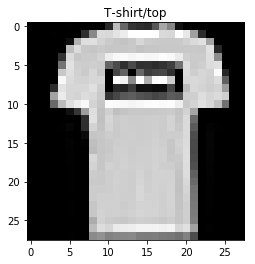

In [22]:
image, label = datasets["train"][1]
print(image.shape, label)
plt.title(classes[label.numpy()])
plt.imshow(image.numpy().squeeze(), cmap="gray")

In [23]:
# Даталоадер это python iterable, который возвращает элементы Dataset бачами. 
#
dataloaders = {x: DataLoader(datasets[x], batch_size=10, shuffle=True, num_workers=0) for x in ["train", "test"]}
batch = next(iter(dataloaders["train"]))
images, labels = batch
print(images.shape)

torch.Size([10, 1, 28, 28])


labels: tensor([6, 8, 7, 5, 1, 2, 1, 1, 4, 1])


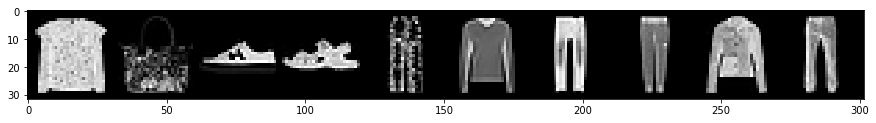

In [24]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

In [25]:
import torch.nn as nn
import torch.nn.functional as F

# Модели в питорче наследуются от nn.Module. В стандартном случае нужно определить только __init__ для описания
# состовляющих частей архитектуры и forward для определения того как они должны взаимодействовать при 
# форварде. 
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * 32, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [31]:
device = "cuda"
model = Network().to(device)
print(model)
print("\nModel parameters shapes:")
for name, parameter in model.named_parameters():
    print(name, parameter.shape)

Network(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

Model parameters shapes:
layer1.0.weight torch.Size([16, 1, 5, 5])
layer1.0.bias torch.Size([16])
layer1.1.weight torch.Size([16])
layer1.1.bias torch.Size([16])
layer2.0.weight torch.Size([32, 16, 5, 5])
layer2.0.bias torch.Size([32])
layer2.1.weight torch.Size([32])
layer2.1.bias torch.Size([32])
fc.weight torch.Size([10, 1568])
fc.bias tor

In [40]:
def train(model, dataloader, n_epoch):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr = LR)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(1, n_epoch + 1):
        for batch_id, (image, label) in enumerate(dataloader):
            label, image = label.to(device), image.to(device)
            output = model(image)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_id % 1000 == 0:
                print('Loss :{:.4f} Epoch[{}/{}]'.format(loss.item(), epoch, n_epoch))
    return model

from sklearn.metrics import confusion_matrix, accuracy_score

def test(model, dataloader):
    predictions = []
    targets = []
    model.eval()
    with torch.no_grad():
        for image, label in dataloader:
            image = image.to(device)
            label = label.to(device)
            outputs = model(image)
            predicted = torch.argmax(outputs,dim=1)
            predictions.extend(predicted.cpu().numpy())
            targets.extend(label.cpu().numpy())
            
        
    predictions = np.array(predictions)
    targets = np.array(targets)
    print(f"Test Accuracy of the model on the test images: {accuracy_score(targets, predictions)*100} %")
    return predictions, targets

In [37]:
LR = 0.01
n_epoch = 5
dataloaders = {x: DataLoader(datasets[x], batch_size=1000, shuffle=x == "train") for x in ["train", "test"]}

In [38]:
model = train(model, dataloader=dataloaders["train"], n_epoch=n_epoch)

Loss :0.2047 Epoch[1/5]
Loss :0.2122 Epoch[2/5]
Loss :0.1650 Epoch[3/5]
Loss :0.1709 Epoch[4/5]
Loss :0.1847 Epoch[5/5]


In [41]:
predictions, targets = test(model, dataloaders["test"])

Test Accuracy of the model on the test images: 90.96 %


torch.Size([1, 28, 28]) tensor(0)


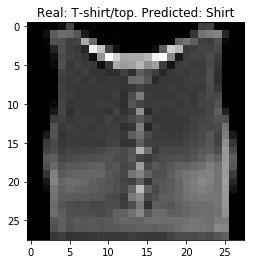

In [42]:
ids = np.where((np.array(predictions) != np.array(targets)))[0]
num = 310
image, label = datasets["test"][ids[num]]
print(image.shape, label)
plt.title(f"Real: {classes[targets[ids[num]]]}. Predicted: {classes[predictions[ids[num]]]}")
plt.imshow(image.numpy().squeeze(), cmap="gray")

Confusion matrix, without normalization


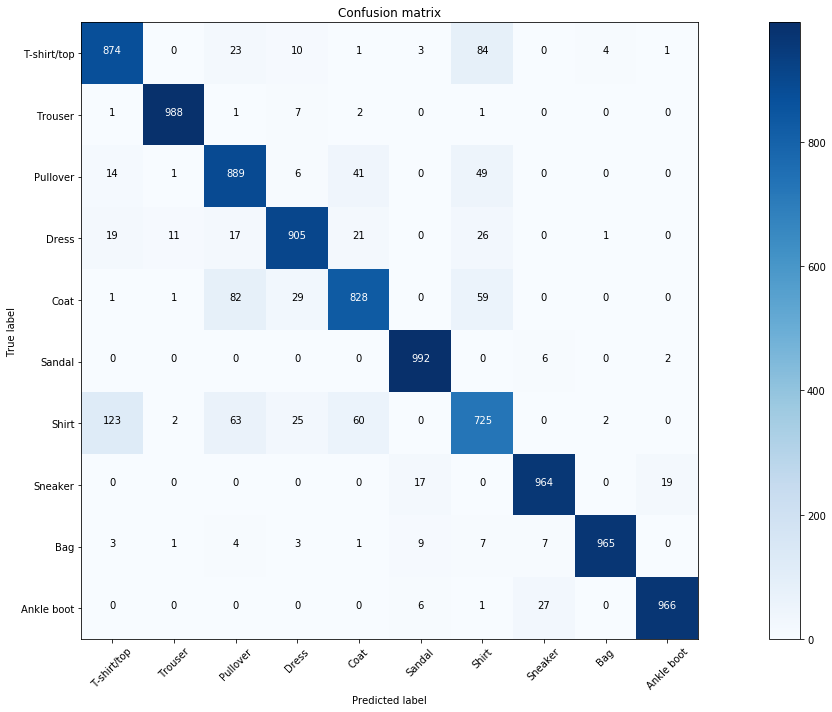

In [43]:
from utils import plot_confusion_matrix

cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, classes, normalize=False)